# Esercitazione 3

In [1]:
import networkx as nx
import copy

In [2]:
def drawGraph(graph):
    G = nx.Graph(graph)
    nx.draw_networkx(G, pos=nx.planar_layout(G))

def drawDiGraph(di_graph):
    G = nx.DiGraph(di_graph)
    nx.draw_networkx(G, pos=nx.planar_layout(G))

## Es. 1. Classe di grafi per cui la DFS e’ uguale a BFS

**Testo**

Che caratteristiche deve avere un grafo connesso perche’ le visite DFS e BFS del grafo producano alberi di visita uguali? Motivare la risposta.

**Soluzione**

Le visite DFS e BFS producono alberi di visita uguali se e solo se ogni componente connessa del grafo è un albero. In questo modo, prendendo un qualsiasi nodo come radice, l’albero di visita risultante sarà lo stesso sia se si sta effettuando una DFS che una BFS.

## Es. 2. Dare un grafo e un albero di cammini minimi che non è il risultato di nessuna BFS

**Testo**

Dare un grafo e un albero di cammini minimi che non è il risultato di nessuna BFS.

**Soluzione**

Preso in esempio il grafo G, in verde sono disegnate le possibili BFS radicate in s, mentre in rosso (G') e' disegnato un albero di cammini minimi, radicato in s, non ottenibile da nessuna BFS radicata in s.
\
![img1](img1.png)

## Es. 3. Trovare i nodi equidistanti tra due nodi dati

**Testo**

Descrivere un algoritmo che, dato un grafo G non diretto e connesso e due suoi nodi u e v, in tempo O(n + m) trova i nodi che hanno la stessa distanza da u e v.

**Idea**

L'idea principale è di utilizzare due BFS, che partono rispettivamente, dal primo e dal secondo nodo dato, calcolando il vettore delle distanze dalla radice della visita. Infine i nodi equidistanti dai due nodi dati avranno la stessa distanza dalla radice in entrambi i vettori delle distanze.
\
Un’altra idea meno performante sarebbe quella di effettuare una BFS radicata su ogni possibile nodo ad esclusione (o meno) di u e v. E quindi per ogni BFS controllare se u e v hanno la stessa distanza rispetto al nodo radice della BFS. Se cosi’ fosse, la radice della BFS e’ un nodo equidistante da u e v. Costo O(n(n+m)). 
\
Riportiamo la soluzione piu’ efficiente.

**Soluzione**

In [3]:
def bfs_dist(root, graph):
    queue = [root]
    dist = {root : 0}
    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in dist:
                queue.append(neighbor)
                dist[neighbor] = dist[node] + 1
    return dist

def find_equidistant_nodes(graph, start_node_1, start_node_2):
    dist_1 = bfs_dist(start_node_1, graph)
    dist_2 = bfs_dist(start_node_2, graph)
    equidistant_nodes = []
    for node in graph:
        if dist_1[node] == dist_2[node]:
            equidistant_nodes.append(node)
    return equidistant_nodes

In [4]:
graph = {
    1 : [3, 4, 5], 
    2 : [3, 5], 
    3 : [1, 2, 5], 
    4 : [1, 5], 
    5 : [1, 2, 3, 4]
}

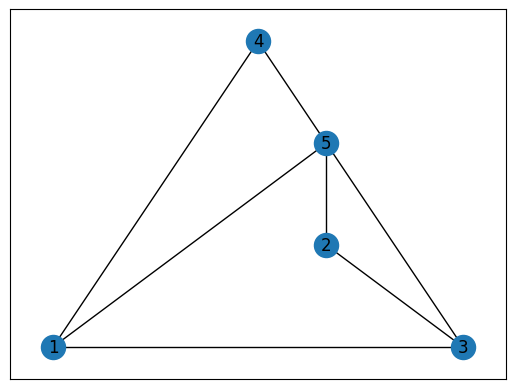

In [5]:
drawGraph(graph)

In [6]:
find_equidistant_nodes(graph, 1, 4)

[2, 5]

# Es. 4. Distanza tra due insiemi di nodi

**Testo**

Dato un grafo G e due sottoinsiemi V1 e V2 dei suoi vertici si definisce distanza tra V1 e V2 la distanza minima per andare da un nodo in V1 ad un nodo in V2. Nel caso V1 e V2 non sono disgiunti allora il valore 0. 
Descrivere un algoritmo che, dato un grafo G e i due sottoinsiemi dei vertici V1 e V2 calcola la loro distanza. L’algoritmo deve avere complessita’ O(n + m). 
\
![img2](img2.png)
\
Ad esempio per il grafo G in figura, dove i nodi dell’insieme A sono in verde mentre i nodi dell’insieme B sono in rosso, la distanza tra i due insiemi e’ 2 come evidenziato dal cammino in blu.

**Idea**

E’ possibile inserire nello stack, all’inizio della BFS, tutti i nodi di V1 interpretando la loro distanza a 0. Cosi’ facendo, proseguendo con ma BFS, avremo a distanza 1 tutti i nodi che distano 1 da un qualsiasi nodo in V1, e cosi’ via per tutte le altre distanze. Quindi nel nostro caso basta fermarci non appena troviamo un nodo di V2 durante questa nostra BFS.

**Soluzione**

In [7]:
def distV1V2(graph, V1, V2):
   D = {node : -1 for node in graph}
   for i in range(len(V1)):
       if i in V1:
           D[i] = 0
   Q = [node for node in graph if node in V1]
   while Q != []:
       u = Q.pop(0)
       if u in V2: return D[u]
       for v in graph[u]:
           if D[v] == -1:
               D[v] = D[u]+1
               Q.append(v)
   return 0

**Esecuzione**

In [8]:
graph = {
    1 : [5, 6], 
    2 : [5], 
    3 : [5, 6], 
    4 : [6], 
    5 : [1, 2, 3],
    6 : [1, 3, 4]
}

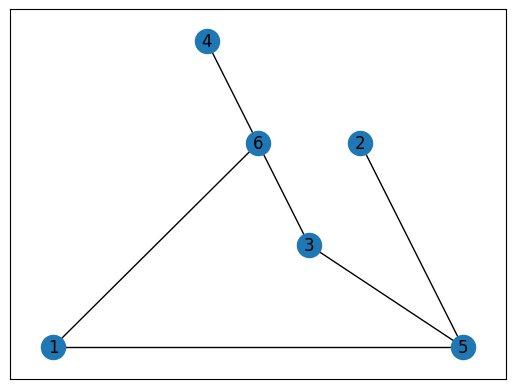

In [9]:
drawGraph(graph)

In [10]:
V1 = {1, 2}
V2 = {3, 4}
distV1V2(graph, V1, V2)

2

# Es. 5. Trovare le distanze tra tutti i nodi e la radice in un albero rappresentato come vettore dei padri

**Testo**

Dato un albero di n nodi rappresentato tramite il vettore dei padri P (per convenzione il padre del nodo radice e’ il nodo stesso), dare lo pseudocodice di un algoritmo che in tempo O(n) calcola la distanza di ogni nodo dalla radice.

In [11]:
'''
Si noti che la funzione dist evita di ricalcolare le distanze già calcolate (perche’ queste 
ultime sono immagazzinate in Dist) e quindi tutti gli archi dell’albero si percorrono 
una sola volta, cosa che giustifica il fatto che questo algoritmo sia lineare
'''

def dist(P, nodo, Dist):
    if Dist[nodo] == -1:
        if P[nodo-1] == nodo: 
            Dist[nodo] = 0 
        else: 
            Dist[nodo] = dist(P, P[nodo-1], Dist) + 1      
    return Dist[nodo]

def distanze(P):
    Dist = {nodo : -1 for nodo in range(1, len(P)+1)} 
    nodi = Dist.keys()
    for nodo in nodi:
        if Dist[nodo] == -1:
            Dist[nodo] = dist(P, nodo, Dist) 
    return Dist 

**Esecuzione**

![img3](img3.png)

In [12]:
P = [2, 2, 1, 2, 4, 3, 3, 9, 1] 
distanze(P)

{1: 1, 2: 0, 3: 2, 4: 1, 5: 2, 6: 3, 7: 3, 8: 3, 9: 2}

# Es. 6. Trasformare un albero da vettore dei padri in liste di adiacenza

**Testo**

Scrivere un algoritmo che, dato un grafo in forma di il vettore dei padri, ritorna la rappresentazione dello stesso grafo in forma di liste di adiacenza.

**Soluzione**

In [13]:
def to_adj_list(P):
    G = {nodo : [] for nodo in range(1, len(P)+1)}
    for nodo in G:
        if P[nodo-1] != nodo:
            G[P[nodo-1]].append(nodo)
    return G

**Esecuzione**

In [14]:
P = [2, 2, 1, 2, 4, 3, 3, 9, 1]
to_adj_list(P)

{1: [3, 9], 2: [1, 4], 3: [6, 7], 4: [5], 5: [], 6: [], 7: [], 8: [], 9: [8]}